In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import calendar
import geopy
from geopy.geocoders import Nominatim
import gmplot
%matplotlib inline

In [2]:
# read the csv file
nyc_jobs = pd.read_csv('nyc-jobs.csv')

In [3]:
# view the dataframe
nyc_jobs

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000
5,133921,NYC HOUSING AUTHORITY,External,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,NaN,Apply online with a cover letter to https://a1...,NaN,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000
7,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",F,...,NaN,"Click the ""Apply Now"" button.",35 Hours per week/Day shift,96-05 Horace Harding Expway,NaN,New York City residency is generally required ...,2013-12-20T00:00:00.000,NaN,2014-07-25T00:00:00.000,2019-07-30T00:00:00.000
8,151131,NYC HOUSING AUTHORITY,External,1,Cost Estimating Manager,ADMINISTRATIVE STAFF ANALYST (,1002D,0,"Engineering, Architecture, & Planning",F,...,SPECIAL INSTRUCTIONS FOR NYCHA EMPLOYEES: N...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2014-06-25T00:00:00.000,NaN,2014-07-07T00:00:00.000,2019-07-30T00:00:00.000
9,151937,NYC HOUSING AUTHORITY,Internal,4,Assistant Project Manager,ASSOCIATE PROJECT MANAGER,22427,2,"Engineering, Architecture, & Planning",F,...,SPECIAL INSTRUCTIONS FOR NYCHA EMPLOYEES: N...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2014-08-16T00:00:00.000,NaN,2014-10-15T00:00:00.000,2019-07-30T00:00:00.000


In [4]:
# get the shape of the dataframe
nyc_jobs.shape

(3123, 28)

In [5]:
# describe the data
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 28 columns):
Job ID                           3123 non-null int64
Agency                           3123 non-null object
Posting Type                     3123 non-null object
# Of Positions                   3123 non-null int64
Business Title                   3123 non-null object
Civil Service Title              3123 non-null object
Title Code No                    3123 non-null object
Level                            3123 non-null object
Job Category                     3121 non-null object
Full-Time/Part-Time indicator    2854 non-null object
Salary Range From                3123 non-null float64
Salary Range To                  3123 non-null float64
Salary Frequency                 3123 non-null object
Work Location                    3123 non-null object
Division/Work Unit               3123 non-null object
Job Description                  3123 non-null object
Minimum Qual Requirements    

#### The dataframe contains 3123 rows and 28 columns. From the initial observation, the following details can be found:
1. Recruitment Contact does not have any value. 
2. Title Code No, # of Positions should be numeric columns, but it is saved as object. 
3. Job ID, Title Code No are nominal columns and can be ignored. 
4. Posting Date, Post Until, Posting Updated, Process Date should be in date time format, but is saved as object
5. Post Until, Hours/Shift, Work Location 1 has very few data. Need to analyze if this column can be removed or not

In [6]:
# print the list of columns
print(nyc_jobs.columns)

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')


In [7]:
# create a function to modify the column name
def modified_column(col):
    col = col.strip().lower()
    col = re.sub(r'[^a-zA-Z0-9]+', '_', col)
    return col

In [8]:
# create an empty list
clean_cols = []

# iterate over the dataframe columns and 
# use the modified_column function to modify the column name 
# and append on the empty list

for column in nyc_jobs.columns:
    updated_col = modified_column(column)
    clean_cols.append(updated_col)

In [9]:
# add the modified column names to the dataframe
nyc_jobs.columns = clean_cols

In [10]:
# print the column names
print(nyc_jobs.columns)

Index(['job_id', 'agency', 'posting_type', '_of_positions', 'business_title',
       'civil_service_title', 'title_code_no', 'level', 'job_category',
       'full_time_part_time_indicator', 'salary_range_from', 'salary_range_to',
       'salary_frequency', 'work_location', 'division_work_unit',
       'job_description', 'minimum_qual_requirements', 'preferred_skills',
       'additional_information', 'to_apply', 'hours_shift', 'work_location_1',
       'recruitment_contact', 'residency_requirement', 'posting_date',
       'post_until', 'posting_updated', 'process_date'],
      dtype='object')


In [11]:
# rename '__of_positions' column to 'no_of_positions'
nyc_jobs.rename({'_of_positions':'no_of_positions'}, axis=1, inplace=True)

# rename 'to_apply' column to 'instruction to apply'
nyc_jobs.rename({'to_apply':'instruction_to_apply'},axis=1, inplace=True)

In [12]:
# as recruitment contact has no data, so dropping the column
nyc_jobs = nyc_jobs.drop(['recruitment_contact'], axis=1)

In [13]:
# get the list of columns having null value
nyc_jobs.columns[nyc_jobs.isnull().any()]

Index(['job_category', 'full_time_part_time_indicator',
       'minimum_qual_requirements', 'preferred_skills',
       'additional_information', 'instruction_to_apply', 'hours_shift',
       'work_location_1', 'post_until'],
      dtype='object')

In [14]:
# get the first 5 rows of the dataframe
nyc_jobs.head(5)

,job_id,agency,posting_type,no_of_positions,business_title,civil_service_title,title_code_no,level,job_category,full_time_part_time_indicator,...,preferred_skills,additional_information,instruction_to_apply,hours_shift,work_location_1,residency_requirement,posting_date,post_until,posting_updated,process_date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000


In [15]:
# get the last 5 rows of the dataframe
nyc_jobs.tail(5)

,job_id,agency,posting_type,no_of_positions,business_title,civil_service_title,title_code_no,level,job_category,full_time_part_time_indicator,...,preferred_skills,additional_information,instruction_to_apply,hours_shift,work_location_1,residency_requirement,posting_date,post_until,posting_updated,process_date
3118,403136,PRESIDENT BOROUGH OF MANHATTAN,External,1,Events Specialist,COMMUNITY ASSOCIATE,56057,0,Constituent Services & Community Programs,F,...,â€¢\tA baccalaureate degree from an accredited...,NaN,Interested candidates must complete both of th...,NaN,NaN,New York City residency is generally required ...,2019-07-29T00:00:00.000,NaN,2019-07-29T00:00:00.000,2019-07-30T00:00:00.000
3119,403140,HOUSING PRESERVATION & DVLPMNT,External,1,"Senior Project Manager, Policy Development and...",CONFIDENTIAL STRATEGY PLANNER,54746,0,"Policy, Research & Analysis",F,...,â€¢\tAt least two yearsâ€™ full-time experienc...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is generally required ...,2019-07-29T00:00:00.000,2019-08-28T00:00:00.000,2019-07-29T00:00:00.000,2019-07-30T00:00:00.000
3120,403140,HOUSING PRESERVATION & DVLPMNT,Internal,1,"Senior Project Manager, Policy Development and...",CONFIDENTIAL STRATEGY PLANNER,54746,0,"Policy, Research & Analysis",F,...,â€¢\tAt least two yearsâ€™ full-time experienc...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is generally required ...,2019-07-29T00:00:00.000,2019-08-28T00:00:00.000,2019-07-29T00:00:00.000,2019-07-30T00:00:00.000
3121,403147,HOUSING PRESERVATION & DVLPMNT,External,1,Project Manager,HOUSING DEVELOPMENT SPECIALIST,22507,1,"Engineering, Architecture, & Planning",F,...,Strong preference for candidates who possess: ...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is generally required ...,2019-07-29T00:00:00.000,2019-08-28T00:00:00.000,2019-07-29T00:00:00.000,2019-07-30T00:00:00.000
3122,403147,HOUSING PRESERVATION & DVLPMNT,Internal,1,Project Manager,HOUSING DEVELOPMENT SPECIALIST,22507,1,"Engineering, Architecture, & Planning",F,...,Strong preference for candidates who possess: ...,NaN,Apply Online.,NaN,100 Gold Street,New York City residency is generally required ...,2019-07-29T00:00:00.000,2019-08-28T00:00:00.000,2019-07-29T00:00:00.000,2019-07-30T00:00:00.000


In [16]:
# as job_id column contains nominal value,so removing the column
nyc_jobs = nyc_jobs.drop(['job_id'], axis=1)

In [17]:
# as title_code_no column contains nominal value,so removing the column
nyc_jobs = nyc_jobs.drop(['title_code_no'], axis=1)

In [18]:
# get the unique counts of full time and part time indicator column
nyc_jobs['full_time_part_time_indicator'].value_counts()

F    2700
P     154
Name: full_time_part_time_indicator, dtype: int64

In [19]:
# create a function to remove special characters, space and convert the data to lowercase
#def clean_data(sentence):
    #text = sentence.replace('&', ',').split(',').strip().rstrip(',')
    #token
    #return text

In [20]:
# apply the above function to clean the data for the below list of columns
#column_lists = ['agency', 'business_title', 'civil_service_title', 'division_work_unit']

#for i in range(4):
    #nyc_jobs[column_lists[i]] = nyc_jobs[column_lists[i]].dropna().apply(clean_data)

In [21]:
# get the unique counts of agency column
nyc_jobs['agency'].value_counts()

DEPT OF ENVIRONMENT PROTECTION    678
DEPT OF HEALTH/MENTAL HYGIENE     276
DEPT OF DESIGN & CONSTRUCTION     239
NYC HOUSING AUTHORITY             222
DEPARTMENT OF TRANSPORTATION      183
DEPT OF INFO TECH & TELECOMM      174
HOUSING PRESERVATION & DVLPMNT     98
LAW DEPARTMENT                     91
ADMIN FOR CHILDREN'S SVCS          83
TAXI & LIMOUSINE COMMISSION        80
OFFICE OF THE COMPTROLLER          73
DEPARTMENT OF BUSINESS SERV.       73
DEPARTMENT OF INVESTIGATION        64
DEPT OF PARKS & RECREATION         57
NYC EMPLOYEES RETIREMENT SYS       52
OFFICE OF MANAGEMENT & BUDGET      52
POLICE DEPARTMENT                  52
DEPARTMENT OF CITY PLANNING        51
OFFICE OF EMERGENCY MANAGEMENT     48
MAYORS OFFICE OF CONTRACT SVCS     44
DEPARTMENT OF CORRECTION           38
FINANCIAL INFO SVCS AGENCY         34
HRA/DEPT OF SOCIAL SERVICES        34
DEPT OF YOUTH & COMM DEV SRVS      31
ADMIN TRIALS AND HEARINGS          29
DEPT OF CITYWIDE ADMIN SVCS        26
DEPARTMENT O

In [22]:
# get the unique counts for business title column
nyc_jobs['business_title'].value_counts()

Project Manager                                                          38
Assistant Civil Engineer                                                 26
ACCOUNTABLE MANAGER                                                      26
Engineering Technician I                                                 20
Director                                                                 20
Assistant General Counsel                                                19
Stationary Engineer (Electric)                                           15
College Aide                                                             14
Community Coordinator                                                    14
Senior Project Manager                                                   14
Confidential Investigator                                                14
Budget Analyst                                                           14
Investigator                                                             14
Deputy Direc

In [23]:
# get the unique count of civil service title column
nyc_jobs['civil_service_title'].value_counts()

COMMUNITY COORDINATOR             185
AGENCY ATTORNEY                   119
CIVIL ENGINEER                    110
CITY RESEARCH SCIENTIST            82
ADMINISTRATIVE PROJECT MANAGER     78
COMPUTER SPECIALIST (SOFTWARE)     62
ADMINISTRATIVE BUSINESS PROMOT     61
ASSOCIATE PROJECT MANAGER          60
CLERICAL ASSOCIATE                 59
ADMINISTRATIVE ENGINEER            57
COMMUNITY ASSOCIATE                56
COLLEGE AIDE (ALL CITY DEPTS)      54
PRINCIPAL ADMINISTRATIVE ASSOC     53
COMPUTER SYSTEMS MANAGER           50
ASSISTANT CIVIL ENGINEER           48
CONSTRUCTION PROJECT MANAGER       46
BUDGET ANALYST (OMB)               46
CONFIDENTIAL INVESTIGATOR          46
IT SECURITY SPECIALIST             45
STAFF ANALYST                      45
ADMINISTRATIVE STAFF ANALYST (     41
EMERGENCY PREPAREDNESS SPECIAL     38
EXECUTIVE AGENCY COUNSEL           37
PROJECT MANAGER                    36
PROCUREMENT ANALYST                35
ADMINISTRATIVE CONSTRUCTION PR     35
RESEARCH PRO

In [24]:
# get the count of division work unit column
nyc_jobs['division_work_unit'].value_counts()

Executive Management              54
Administration                    41
Citywide Cybersecurity            40
Default                           38
Blue Belt Unit                    36
Sidewalk/inspection Management    34
Central Brookly City Operation    32
Green Infrastructure              26
Information Technology            25
W   S/Connections Permitting      24
Census                            24
Infra-Coastal Resiliency          24
Water Quality Unit                24
OCME-Admin                        24
OCME-Operations                   23
Operations                        22
SH Nursing Services & Prof Dev    21
Law Department                    20
General Counsel                   20
Technology                        20
Environmental Health & Safety     20
Infra-Program Admin-Executive     20
Prosecution Division              19
Lead Hazard Control Department    18
LongTerm Planning&Sustainablty    17
Administration-MO                 16
Contract Administration           16
D

In [25]:
# get the summary of the dataframe
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 25 columns):
agency                           3123 non-null object
posting_type                     3123 non-null object
no_of_positions                  3123 non-null int64
business_title                   3123 non-null object
civil_service_title              3123 non-null object
level                            3123 non-null object
job_category                     3121 non-null object
full_time_part_time_indicator    2854 non-null object
salary_range_from                3123 non-null float64
salary_range_to                  3123 non-null float64
salary_frequency                 3123 non-null object
work_location                    3123 non-null object
division_work_unit               3123 non-null object
job_description                  3123 non-null object
minimum_qual_requirements        3111 non-null object
preferred_skills                 2748 non-null object
additional_information      

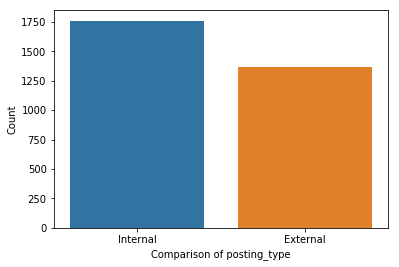

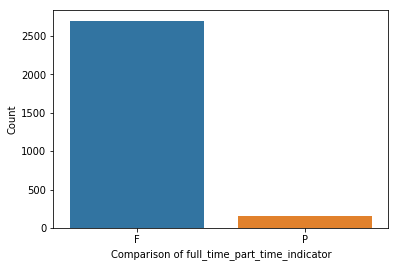

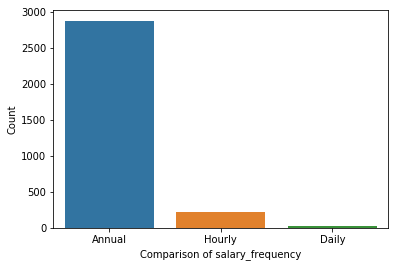

<Figure size 432x288 with 0 Axes>

In [26]:
## create a plot to do comparison for the below columns

# create a list with the names of the columns
column_list = ['posting_type', 'full_time_part_time_indicator','salary_frequency']

# create the plot by iterating over the column names
for column in range(3):
    sns.countplot(x = column_list[column], data=nyc_jobs)
    plt.xlabel('Comparison of {}'.format(column_list[column]))
    plt.ylabel('Count')
    plt.show()
    plt.savefig("data.png")

Text(0.5, 1.0, 'Top Agency Count')

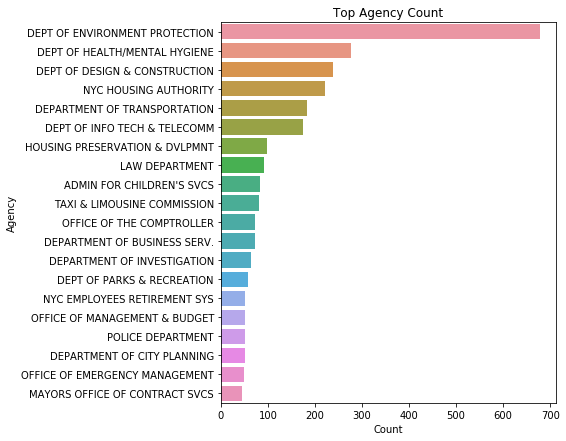

In [27]:
# create a count plot to see which agency has the highest count
plt.figure(figsize=(6,7))
titles_freq = nyc_jobs.agency.value_counts()
popular_titles = titles_freq.iloc[:20]
sns.countplot(y='agency', data=nyc_jobs, order=popular_titles.index)
plt.xlabel('Count')
plt.ylabel('Agency')
plt.title('Top Agency Count')

Text(0.5, 1.0, 'Top Civil Service Title')

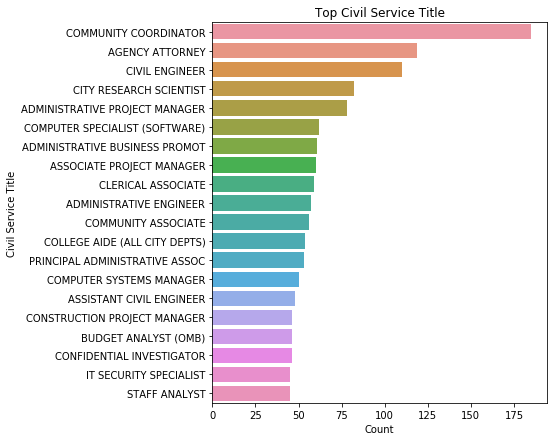

In [28]:
# create a count plot to see which civil_service_title has the highest count
plt.figure(figsize=(6,7))
titles_freq = nyc_jobs.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:20]
sns.countplot(y='civil_service_title', data=nyc_jobs, order=popular_titles.index)
plt.xlabel('Count')
plt.ylabel('Civil Service Title')
plt.title('Top Civil Service Title')

Text(0.5, 1.0, 'Top Division Work Unit')

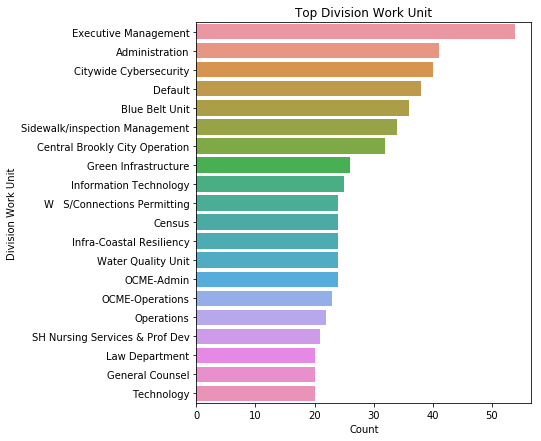

In [29]:
# create a count plot to see which division_work_unit has the highest count
plt.figure(figsize=(6,7))
titles_freq = nyc_jobs.division_work_unit.value_counts()
popular_titles = titles_freq.iloc[:20]
sns.countplot(y='division_work_unit', data=nyc_jobs, order=popular_titles.index)
plt.xlabel('Count')
plt.ylabel('Division Work Unit')
plt.title('Top Division Work Unit')

Text(0.5, 1.0, 'Top Business Title')

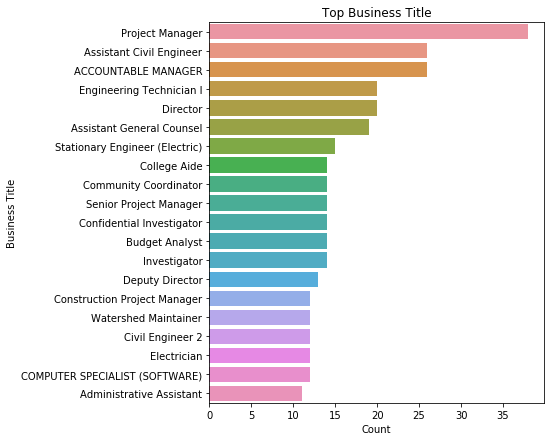

In [30]:
# create a count plot to see which business_title has the highest count
plt.figure(figsize=(6,7))
titles_freq = nyc_jobs.business_title.value_counts()
popular_titles = titles_freq.iloc[:20]
sns.countplot(y='business_title', data=nyc_jobs, order=popular_titles.index)
plt.xlabel('Count')
plt.ylabel('Business Title')
plt.title('Top Business Title')

In [31]:
# get the unique counts of job category column
nyc_jobs['job_category'].value_counts().iloc[:20]

Engineering, Architecture, & Planning                                              520
Technology, Data & Innovation                                                      369
Public Safety, Inspections, & Enforcement                                          219
Legal Affairs                                                                      206
Health                                                                             185
Building Operations & Maintenance                                                  168
Constituent Services & Community Programs                                          157
Finance, Accounting, & Procurement                                                 151
Policy, Research & Analysis                                                        120
Administration & Human Resources                                                   119
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement     96
Social Services                            

In [32]:
# as the job category contains multiple categories listed together, so created the below function to segregate the 
# category

def clean_job(job_details):
    # replace & with comma and convert to list
    job = job_details.replace('&', ',').split(',')
    job = [job_details.strip().rstrip(',') for job_details in job]
    # adding all the items at the end of the list updated_jobs
    return updated_jobs.extend(job)

In [33]:
# create an empty list
updated_jobs = []
# apply the above function to get the list of job category
nyc_jobs.job_category.dropna().apply(clean_job)
# convert to pandas series
updated_jobs = pd.Series(updated_jobs)
updated_jobs = updated_jobs[updated_jobs!='']
popular_jobs = updated_jobs.value_counts()

Text(0.5, 1.0, 'Top Job Categories')

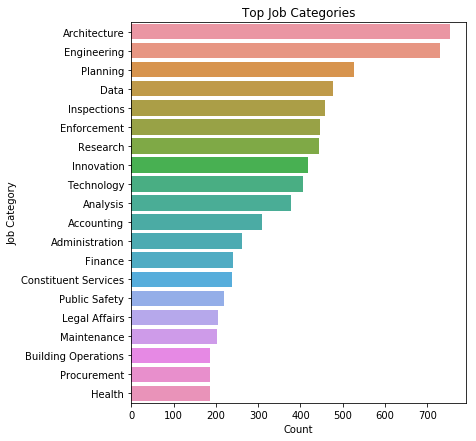

In [34]:
# create a count plot to see which job category has the highest count
plt.figure(figsize=(6,7))
popular_title = popular_jobs.iloc[:20]
sns.countplot(y=updated_jobs,order=popular_title.index)
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.title('Top Job Categories')

In [35]:
stop_words = set(stopwords.words("english"))
print(len(stop_words))
print(stop_words)

179
{'any', 'can', 're', "needn't", 'don', 'that', 'during', 'down', 'very', 'will', 'on', 'but', 'only', 'herself', 'such', 'weren', 't', 'what', "mustn't", 'after', 'were', 'do', "shouldn't", "couldn't", 'who', 'until', 'our', "don't", 'ma', 'you', 'are', 'he', 'it', 'being', 'while', "shan't", 'all', 'each', 'with', "didn't", 'so', "wasn't", 'at', 'has', "hasn't", 'when', 'yourself', 'she', 'having', 'been', 'mustn', 'their', 'whom', 'not', 'shan', 'the', 'hasn', "that'll", 'no', 'd', 'mightn', 'needn', 'against', 'because', "doesn't", 'is', 'to', 'hadn', "wouldn't", "isn't", "mightn't", 've', 'under', 'both', 'why', 'about', 'which', 'himself', 'be', 'below', "should've", 'o', 'yourselves', 'as', 'an', 'my', 'll', 's', "haven't", 'aren', 'few', 'yours', 'these', 'didn', 'those', 'm', 'from', 'there', 'have', 'y', 'than', 'doing', 'just', 'before', 'her', 'hers', 'haven', 'itself', 'wasn', 'themselves', 'and', 'more', "hadn't", "you've", 'your', 'theirs', 'up', 'doesn', 'in', 'where

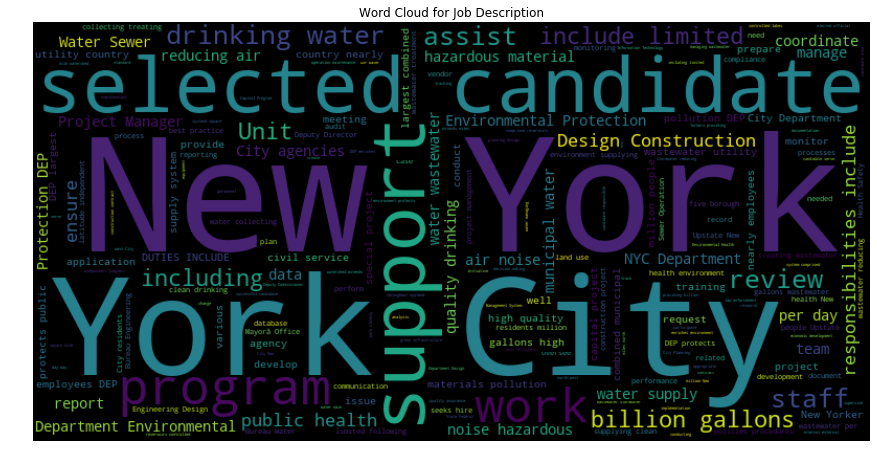

In [36]:
text = " ".join(skills for skills in nyc_jobs.job_description.dropna())
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, margin=5, random_state=1, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Description')
plt.show()

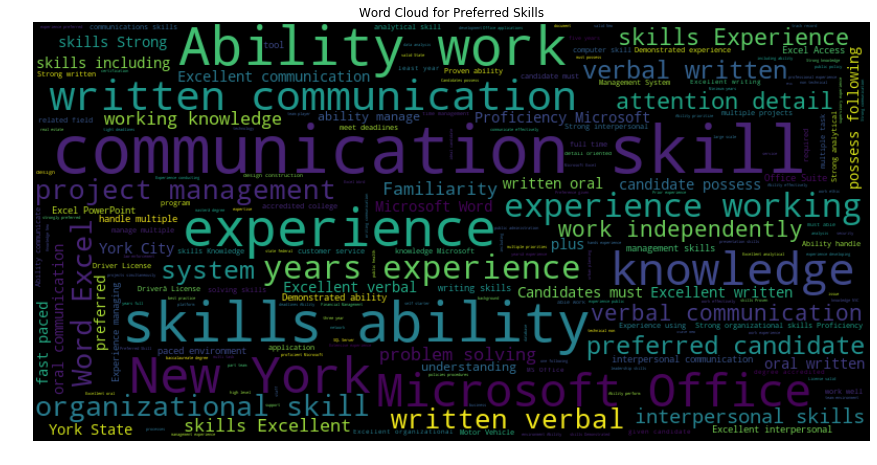

In [37]:
text = " ".join(skills for skills in nyc_jobs.preferred_skills.dropna())
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, margin=5, random_state=1, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Preferred Skills')
plt.show()

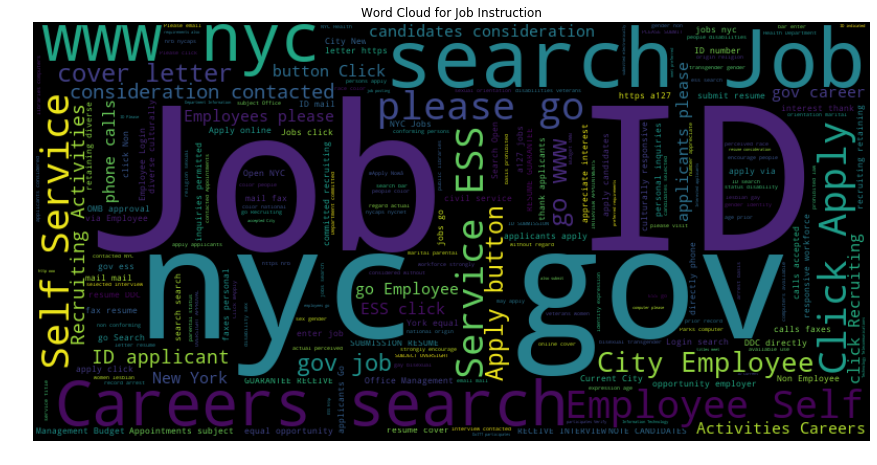

In [38]:
text = " ".join(skills for skills in nyc_jobs.instruction_to_apply.dropna())
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, margin=5, random_state=1, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Instruction')
plt.show()

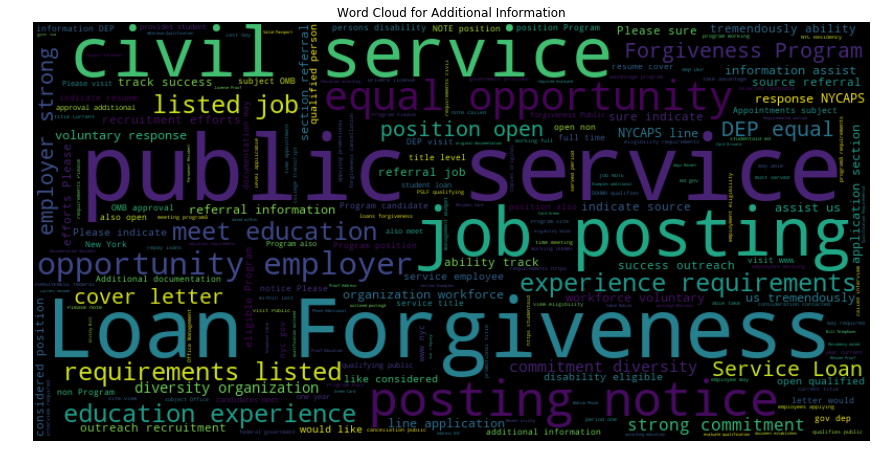

In [39]:
text = " ".join(skills for skills in nyc_jobs.additional_information.dropna())
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, margin=5, random_state=1, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Additional Information')
plt.show()

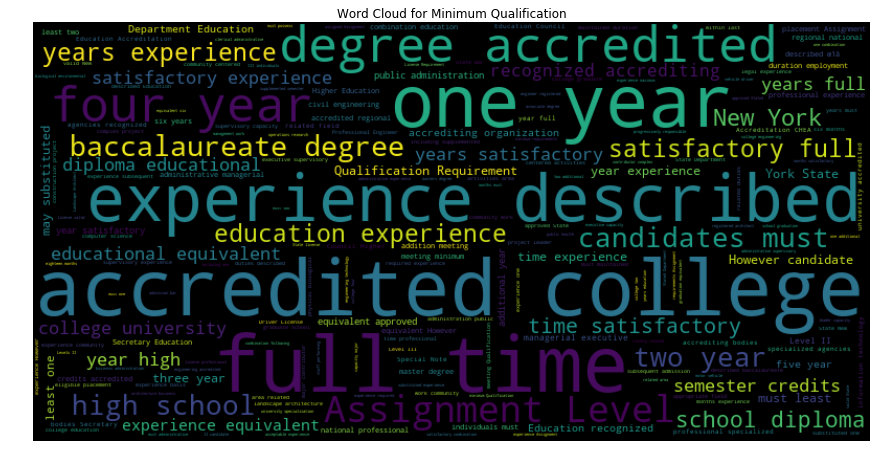

In [40]:
text = " ".join(skills for skills in nyc_jobs.minimum_qual_requirements.dropna())
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, margin=5, random_state=1, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Minimum Qualification')
plt.show()

In [41]:
# get the view of the first 20 rows of civil service title, 
nyc_jobs[['civil_service_title','business_title','salary_frequency','salary_range_from','salary_range_to']][:20]

,civil_service_title,business_title,salary_frequency,salary_range_from,salary_range_to
0,CONTRACT REVIEWER (OFFICE OF L,Account Manager,Annual,42405.00,65485.00
1,ADMINISTRATIVE BUSINESS PROMOT,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",Annual,60740.00,162014.00
2,MAINTENANCE WORKER,Maintenance Worker - Technical Services-Heatin...,Annual,51907.68,54580.32
3,MAINTENANCE WORKER,Maintenance Worker - Technical Services-Heatin...,Annual,51907.68,54580.32
4,PAINTER,Temporary Painter,Hourly,35.00,35.00
5,PAINTER,Temporary Painter,Hourly,35.00,35.00
6,PROCUREMENT ANALYST,Contract Analyst,Annual,50598.00,85053.00
7,ASSOCIATE CHEMIST,Associate Chemist,Annual,50623.00,75083.00
8,ADMINISTRATIVE STAFF ANALYST (,Cost Estimating Manager,Annual,90000.00,110000.00
9,ASSOCIATE PROJECT MANAGER,Assistant Project Manager,Annual,62942.00,92249.00


In [42]:
# Get the average lower salary trend based on civil service title
civil_low_salary = nyc_jobs.groupby(['civil_service_title'])['salary_range_from'].mean().nlargest(20).reset_index()
civil_low_salary

,civil_service_title,salary_range_from
0,DEPUTY COMMISSIONER (DEP),214086.000000
1,DEPUTY COMMISIONER(HOMELESS SE,200931.000000
2,DEPUTY COMMISSIONER (HOUSING P,186666.666667
3,DIRECTOR OF RESEARCH & POLICY,185000.000000
4,ASSISTANT COMMISSIONER (DEP),175000.000000
5,INVESTMENT MANAGER (COMPTROLLE,160000.000000
6,BUDGET ANALYST (OMB)-MANAGERIA,151915.333333
7,ASSISTANT EXECUTIVE DIRECTOR (,145000.000000
8,DIR OF QUALITY & COST CONTROL,145000.000000
9,INSPECTOR GENERAL,140000.000000


Text(0.5, 1.0, 'Average Low Salary Civil Service Title')

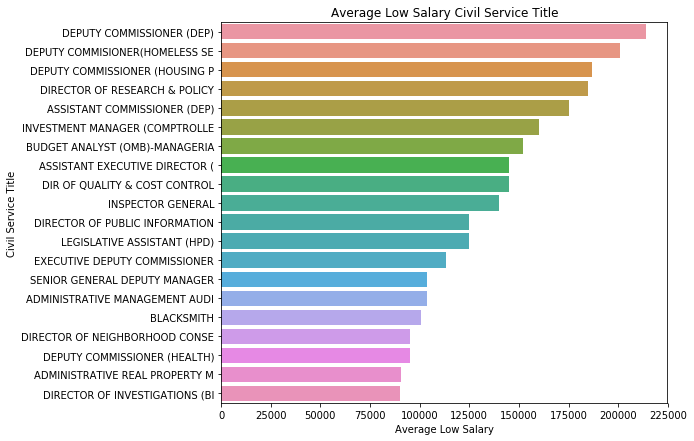

In [43]:
# create a bar plot to see which civil service title get the lowest average salary
plt.figure(figsize=(8,7))
sns.barplot(y='civil_service_title', x='salary_range_from', data=civil_low_salary)
plt.xlabel('Average Low Salary')
plt.ylabel('Civil Service Title')
plt.title('Average Low Salary Civil Service Title')

In [44]:
# Get the average higher salary trend based on civil service title
civil_high_salary = nyc_jobs.groupby(['civil_service_title'])['salary_range_to'].mean().nlargest(20).reset_index()
civil_high_salary

,civil_service_title,salary_range_to
0,SENIOR GENERAL DEPUTY MANAGER,234402.000000
1,EXECUTIVE DEPUTY COMMISSIONER,230000.000000
2,DEPUTY COMMISSIONER (HEALTH),225217.000000
3,ADMINISTRATIVE REAL PROPERTY M,219745.666667
4,ADMINISTRATIVE PROGRAM OFFICE,217244.000000
5,DEPUTY COMMISIONER(HOMELESS SE,214848.000000
6,DEPUTY COMMISSIONER (DEP),214086.000000
7,DEPUTY COMMISSIONER (BUILDINGS,212960.000000
8,DEPUTY COMMISSIONER (HOUSING P,204080.666667
9,DIRECTOR OF CONTRACT ADMINISTR,202744.000000


Text(0.5, 1.0, 'Average High Salary Civil Service Title')

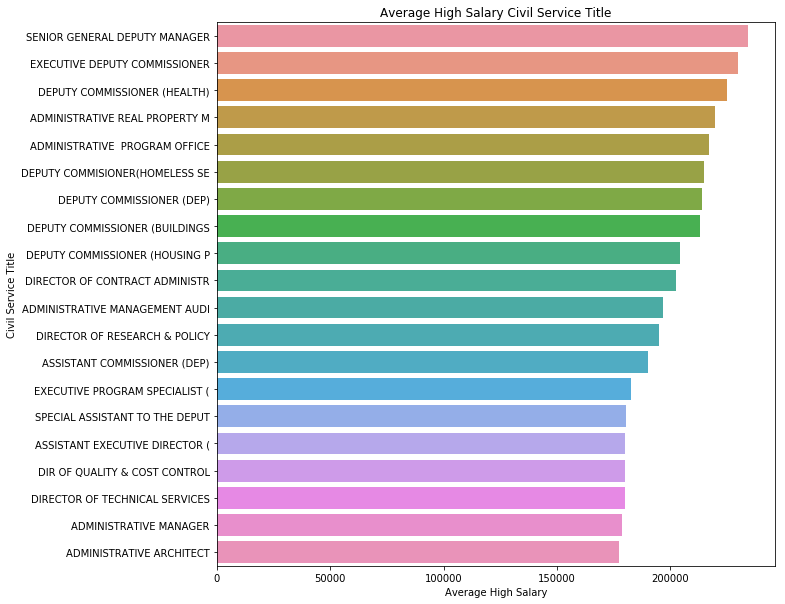

In [45]:
# create a bar plot to see which civil service title get the highest average salary
plt.figure(figsize=(10,10))
sns.barplot(y='civil_service_title', x='salary_range_to', data=civil_high_salary)
plt.xlabel('Average High Salary')
plt.ylabel('Civil Service Title')
plt.title('Average High Salary Civil Service Title')

In [46]:
# get the rows for which salary frequency is Annual
annual_salary = nyc_jobs[nyc_jobs['salary_frequency']=='Annual']

Text(0.5, 1.0, 'Highest Annual Salary Business Title')

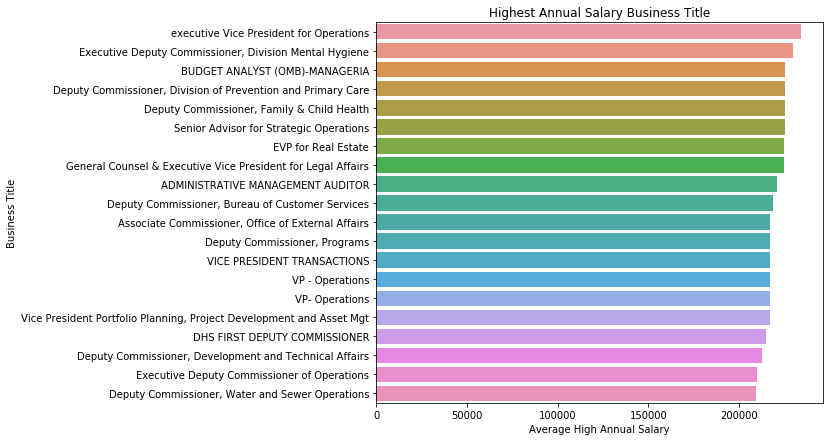

In [47]:
# create a bar plot to see which business title get the highest annual salary
business_title_annual = annual_salary.groupby(['business_title'])['salary_range_to'].mean().nlargest(20).reset_index()
business_title_annual
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_to', data=business_title_annual)
plt.xlabel('Average High Annual Salary')
plt.ylabel('Business Title')
plt.title('Highest Annual Salary Business Title')

Text(0.5, 1.0, 'Low Annual Salary Business Title')

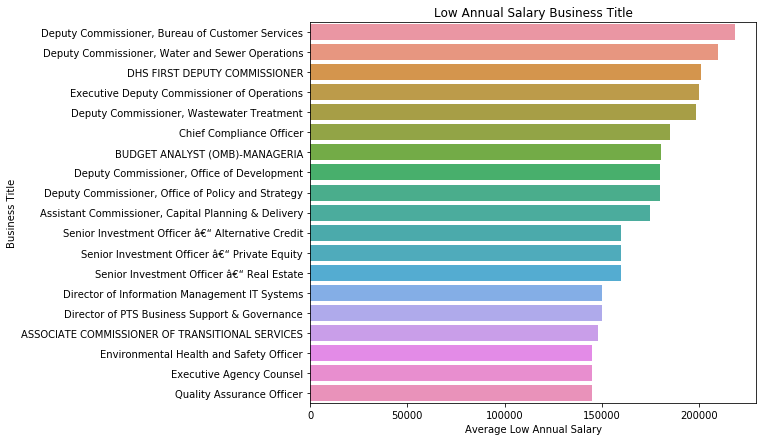

In [48]:
# create a bar plot to see which business title get the lowest annual salary
business_title_annual = annual_salary.groupby(['business_title'])['salary_range_from'].mean().nlargest(19).reset_index()
business_title_annual
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_from', data=business_title_annual)
plt.xlabel('Average Low Annual Salary')
plt.ylabel('Business Title')
plt.title('Low Annual Salary Business Title')

In [49]:
# get the rows for which salary frequency is Hourly
hourly_salary = nyc_jobs[nyc_jobs['salary_frequency']=='Hourly']

Text(0.5, 1.0, 'High Hourly Salary Business Title')

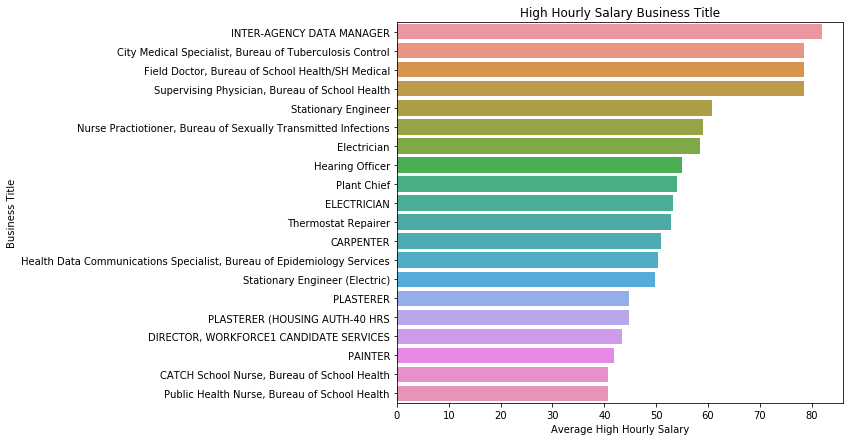

In [50]:
# create a bar plot to see which business title get the highest hourly salary
business_title_hourly = hourly_salary.groupby(['business_title'])['salary_range_to'].mean().nlargest(20).reset_index()
business_title_hourly
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_to', data=business_title_hourly)
plt.xlabel('Average High Hourly Salary')
plt.ylabel('Business Title')
plt.title('High Hourly Salary Business Title')

Text(0.5, 1.0, 'Low Hourly Salary Business Title')

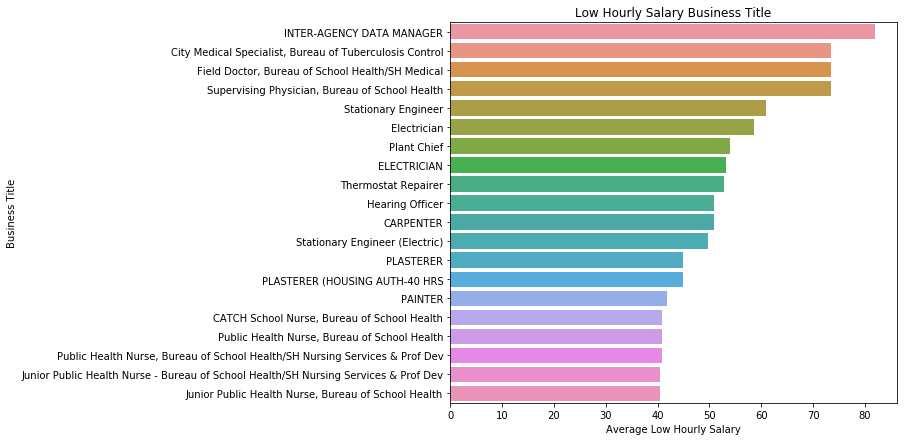

In [51]:
# create a bar plot to see which business title get the lowest hourly salary
business_title_hourly = hourly_salary.groupby(['business_title'])['salary_range_from'].mean().nlargest(20).reset_index()
business_title_hourly
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_from', data=business_title_hourly)
plt.xlabel('Average Low Hourly Salary')
plt.ylabel('Business Title')
plt.title('Low Hourly Salary Business Title')

In [52]:
# get the rows for which salary frequency is Daily
daily_salary = nyc_jobs[nyc_jobs['salary_frequency']=='Daily']

Text(0.5, 1.0, 'High Daily Salary Business Title')

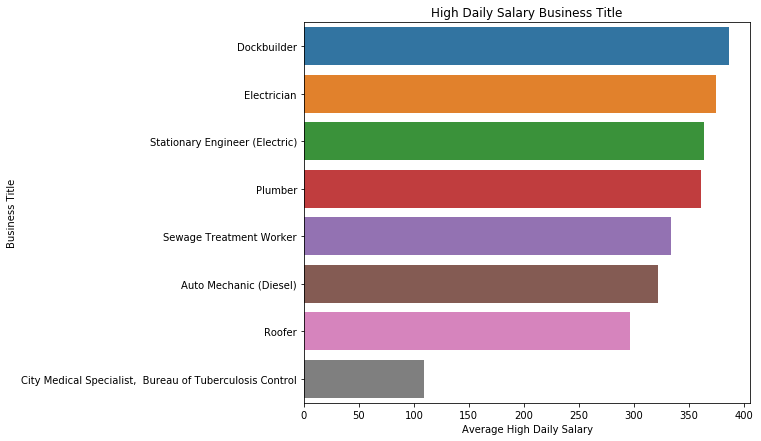

In [53]:
# create a bar plot to see which business title get the highest daily salary
business_title_daily = daily_salary.groupby(['business_title'])['salary_range_to'].mean().nlargest(20).reset_index()
business_title_daily
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_to', data=business_title_daily)
plt.xlabel('Average High Daily Salary')
plt.ylabel('Business Title')
plt.title('High Daily Salary Business Title')

Text(0.5, 1.0, 'Low Daily Salary Business Title')

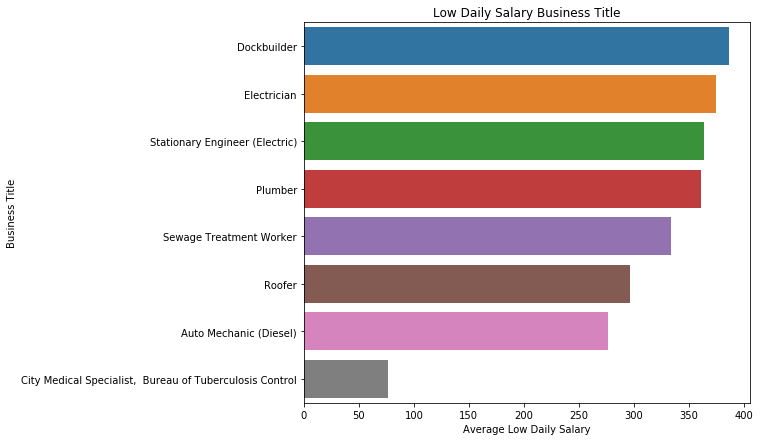

In [54]:
# create a bar plot to see which business title get the lowest daily salary
business_title_daily = daily_salary.groupby(['business_title'])['salary_range_from'].mean().nlargest(20).reset_index()
business_title_daily
plt.figure(figsize=(8,7))
sns.barplot(y='business_title', x='salary_range_from', data=business_title_daily)
plt.xlabel('Average Low Daily Salary')
plt.ylabel('Business Title')
plt.title('Low Daily Salary Business Title')

In [55]:
# get the first 10 rows of posting_date, posting_update, process_date
nyc_jobs[['posting_date','process_date','posting_updated']][:10]

,posting_date,process_date,posting_updated
0,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000,2011-06-24T00:00:00.000
1,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000,2012-01-26T00:00:00.000
2,2013-10-24T00:00:00.000,2019-07-30T00:00:00.000,2013-12-12T00:00:00.000
3,2013-10-24T00:00:00.000,2019-07-30T00:00:00.000,2013-12-12T00:00:00.000
4,2014-01-09T00:00:00.000,2019-07-30T00:00:00.000,2014-01-08T00:00:00.000
5,2014-01-09T00:00:00.000,2019-07-30T00:00:00.000,2014-01-08T00:00:00.000
6,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000,2013-12-09T00:00:00.000
7,2013-12-20T00:00:00.000,2019-07-30T00:00:00.000,2014-07-25T00:00:00.000
8,2014-06-25T00:00:00.000,2019-07-30T00:00:00.000,2014-07-07T00:00:00.000
9,2014-08-16T00:00:00.000,2019-07-30T00:00:00.000,2014-10-15T00:00:00.000


In [56]:
# convert to the dates to datetime objects
nyc_jobs['posting_date'] = pd.to_datetime(nyc_jobs['posting_date'])
nyc_jobs['process_date'] = pd.to_datetime(nyc_jobs['process_date'])
nyc_jobs['posting_updated'] = pd.to_datetime(nyc_jobs['posting_updated'])

In [57]:
# get the first 10 rows of updated posting_date, posting_update, process_date
nyc_jobs[['posting_date','process_date','posting_updated']][:10]

,posting_date,process_date,posting_updated
0,2011-06-24,2019-07-30,2011-06-24
1,2012-01-26,2019-07-30,2012-01-26
2,2013-10-24,2019-07-30,2013-12-12
3,2013-10-24,2019-07-30,2013-12-12
4,2014-01-09,2019-07-30,2014-01-08
5,2014-01-09,2019-07-30,2014-01-08
6,2013-12-09,2019-07-30,2013-12-09
7,2013-12-20,2019-07-30,2014-07-25
8,2014-06-25,2019-07-30,2014-07-07
9,2014-08-16,2019-07-30,2014-10-15


In [58]:
# extract the years and months from the datetime columns and create new columns
nyc_jobs['posting_year'], nyc_jobs['posting_month'] = nyc_jobs['posting_date'].dt.year, nyc_jobs['posting_date'].dt.month

In [59]:
# see the summary of the dataframe
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 27 columns):
agency                           3123 non-null object
posting_type                     3123 non-null object
no_of_positions                  3123 non-null int64
business_title                   3123 non-null object
civil_service_title              3123 non-null object
level                            3123 non-null object
job_category                     3121 non-null object
full_time_part_time_indicator    2854 non-null object
salary_range_from                3123 non-null float64
salary_range_to                  3123 non-null float64
salary_frequency                 3123 non-null object
work_location                    3123 non-null object
division_work_unit               3123 non-null object
job_description                  3123 non-null object
minimum_qual_requirements        3111 non-null object
preferred_skills                 2748 non-null object
additional_information      

Text(0.5, 1.0, 'Yearly Job Posting Trend')

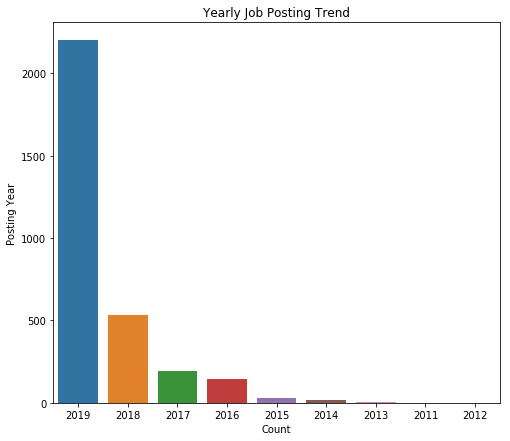

In [60]:
# get which year has highest number of job posted
plt.figure(figsize=(8, 7))
job_year = nyc_jobs['posting_year'].value_counts().index
sns.countplot(x='posting_year', data=nyc_jobs, order = job_year)
plt.xlabel('Count')
plt.ylabel('Posting Year')
plt.title('Yearly Job Posting Trend')

In [61]:
# see the first 20 rows of posting year and number of positions
nyc_jobs[['posting_year','no_of_positions']][:20]

,posting_year,no_of_positions
0,2011,1
1,2012,1
2,2013,52
3,2013,52
4,2014,50
5,2014,50
6,2013,1
7,2013,1
8,2014,1
9,2014,4


Text(0.5, 1.0, 'Yearly Trend of Number of Positions Opened')

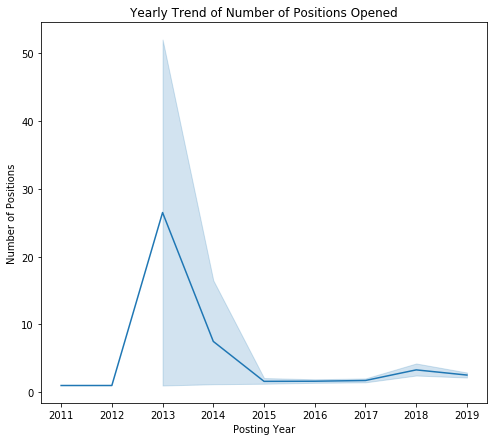

In [62]:
# get the yearly trend of number of positions opened
plt.figure(figsize=(8,7))
sns.lineplot('posting_year','no_of_positions', data=nyc_jobs)
plt.ylabel('Number of Positions')
plt.xlabel('Posting Year')
plt.title('Yearly Trend of Number of Positions Opened')

In [63]:
# convert month to name
nyc_jobs['posting_month'] = nyc_jobs['posting_month'].apply(lambda x: calendar.month_abbr[x])

Text(0.5, 1.0, 'Monthly Job Posting Trend')

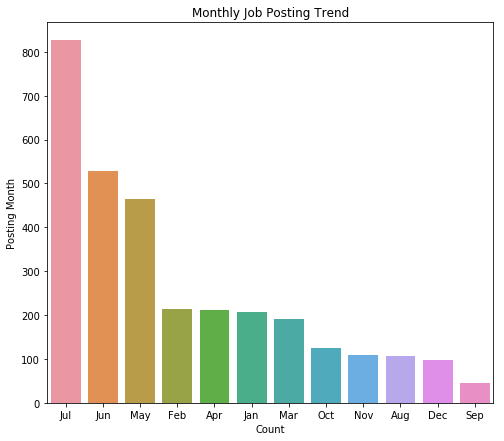

In [64]:
# get which month has highest number of job posted
plt.figure(figsize=(8,7))
job_month = nyc_jobs['posting_month'].value_counts().index
sns.countplot(x='posting_month', data=nyc_jobs, order = job_month)
plt.xlabel('Count')
plt.ylabel('Posting Month')
plt.title('Monthly Job Posting Trend')

Text(0.5, 1.0, 'Monthly Trend of Number of Positions Opened')

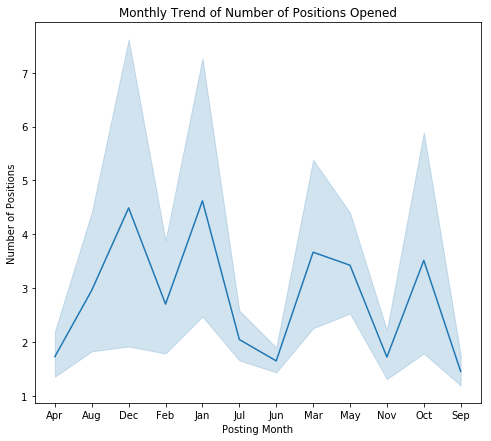

In [65]:
# get the monthly trend of number of positions opened
plt.figure(figsize=(8,7))
sns.lineplot('posting_month','no_of_positions', data=nyc_jobs)
plt.ylabel('Number of Positions')
plt.xlabel('Posting Month')
plt.title('Monthly Trend of Number of Positions Opened')

In [66]:
# view first 10 rows of work location and work_location_1
nyc_jobs[['work_location','work_location_1']][:10]

,work_location,work_location_1
0,110 William St. N Y,NaN
1,110 William St. N Y,NaN
2,Heating Mgt-Operations,NaN
3,Heating Mgt-Operations,NaN
4,DMP-Contract & Analysis Unit,NaN
5,DMP-Contract & Analysis Unit,NaN
6,42-09 28th Street,"42-09 28th Street, Long Island City, NY"
7,96-05 Horace Harding Expway,96-05 Horace Harding Expway
8,CP Cap Plan-Technical Planning,NaN
9,Office for Exec Proj Manager,NaN


In [67]:
# rename 'work_location' column to 'work_address'
nyc_jobs.rename({'work_location':'work_address'},axis=1, inplace=True)

In [68]:
# get the first 20 unique counts of work address
high_work_data = nyc_jobs['work_address'].value_counts().iloc[:20]

In [69]:
high_work_data

96-05 Horace Harding Expway       302
30-30 Thomson Ave L I City Qns    239
59-17 Junction Blvd Corona Ny     204
55 Water St Ny Ny                 132
1 Centre St., N.Y.                123
100 Church St., N.Y.              106
42-09 28th Street                 105
100 Gold Street                    95
255 Greenwich Street               94
110 William St. N Y                74
33 Beaver St, New York Ny          70
2 Metro Tech                       68
150 William Street, New York N     68
253 Broadway New York Ny           57
80 Maiden Lane                     56
421 East 26th Street NY NY         54
335 Adams Street, Brooklyn Ny      52
NYC - All Boroughs                 49
120 Broadway, New York, NY         49
165 Cadman Plaza East              48
Name: work_address, dtype: int64

In [70]:
# convert the unique count to dataframe
address_count = high_work_data.rename_axis('work_address').reset_index(name='counts')

In [71]:
# see the dataframe
address_count

,work_address,counts
0,96-05 Horace Harding Expway,302
1,30-30 Thomson Ave L I City Qns,239
2,59-17 Junction Blvd Corona Ny,204
3,55 Water St Ny Ny,132
4,"1 Centre St., N.Y.",123
5,"100 Church St., N.Y.",106
6,42-09 28th Street,105
7,100 Gold Street,95
8,255 Greenwich Street,94
9,110 William St. N Y,74


In [72]:
# rename the value of the first column
address_count = address_count.replace('96-05 Horace Harding Expway', '96-05 Horace Harding Expressway')
address_count = address_count.replace('30-30 Thomson Ave L I City Qns', '30-30 Thomson Ave LI City')
address_count = address_count.replace('421 East 26th Street NY NY', '421 East 26th Street NY')

In [73]:
geolocator = Nominatim(user_agent="my-application")
address_count['coordinates'] = address_count['work_address'].apply(geolocator.geocode)

In [74]:
# adding coordinates column by generating the coordinates for each work address
address_count['coordinates'] = address_count['coordinates'].apply(lambda x: (x.latitude, x.longitude))

In [75]:
address_count

,work_address,counts,coordinates
0,96-05 Horace Harding Expressway,302,"(40.7349322, -73.8635554150424)"
1,30-30 Thomson Ave LI City,239,"(40.7448662, -73.9359346)"
2,59-17 Junction Blvd Corona Ny,204,"(40.7461455, -73.8682335)"
3,55 Water St Ny Ny,132,"(40.7032228, -74.0090630018927)"
4,"1 Centre St., N.Y.",123,"(40.7129897, -74.0036140643417)"
5,"100 Church St., N.Y.",106,"(40.71328865, -74.0101247934377)"
6,42-09 28th Street,105,"(40.7493507, -73.9389579187682)"
7,100 Gold Street,95,"(58.301618, -134.405906)"
8,255 Greenwich Street,94,"(40.520857, -75.779724)"
9,110 William St. N Y,74,"(40.7087755, -74.0067691170635)"


In [76]:
# sliced the coordinates column to two additional columns - latitude and longitude
address_count[['latitude', 'longitude']] = pd.DataFrame(address_count['coordinates'].tolist(), index=address_count.index)

In [77]:
address_count

,work_address,counts,coordinates,latitude,longitude
0,96-05 Horace Harding Expressway,302,"(40.7349322, -73.8635554150424)",40.734932,-73.863555
1,30-30 Thomson Ave LI City,239,"(40.7448662, -73.9359346)",40.744866,-73.935935
2,59-17 Junction Blvd Corona Ny,204,"(40.7461455, -73.8682335)",40.746145,-73.868234
3,55 Water St Ny Ny,132,"(40.7032228, -74.0090630018927)",40.703223,-74.009063
4,"1 Centre St., N.Y.",123,"(40.7129897, -74.0036140643417)",40.712990,-74.003614
5,"100 Church St., N.Y.",106,"(40.71328865, -74.0101247934377)",40.713289,-74.010125
6,42-09 28th Street,105,"(40.7493507, -73.9389579187682)",40.749351,-73.938958
7,100 Gold Street,95,"(58.301618, -134.405906)",58.301618,-134.405906
8,255 Greenwich Street,94,"(40.520857, -75.779724)",40.520857,-75.779724
9,110 William St. N Y,74,"(40.7087755, -74.0067691170635)",40.708776,-74.006769


In [78]:
# Store our latitude and longitude
latitudes = address_count['latitude']
longitudes = address_count['longitude']

In [79]:
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(40.730610, -73.935242, 12)

In [80]:
# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw('my_heatmap.html')

In [81]:
### MAP WILL ONLY RENDER WITH CHROME ###

import folium
from folium import plugins

In [82]:
locations = address_count[['latitude', 'longitude']]
locationlist = locations.values.tolist()

In [87]:
NYmap = folium.Map(location=[40.7128,-74.0060], zoom_start=10.2)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],fill_color='#43dbde', radius=2, popup=address_count['counts'][point]).add_to(NYmap)
NYmap

In [88]:
for index, row in address_count.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['work_address'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(NYmap)

In [90]:
# convert to (n, 2) nd-array format for heatmap
stationArr = address_count[['latitude', 'longitude']].values

# plot heatmap
NYmap.add_child(plugins.HeatMap(stationArr, radius=15))
NYmap